In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/mingao/Desktop/MG-Project_Ideas/train_test_small.csv', skipinitialspace=True)
df.head()

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  \
0      1            7          0               2        MORNING   
1      1            7          0               7        MORNING   
2      1            7          0               7        MORNING   
3      1            7          0               9        MORNING   
4      1            7          0               7  EARLY_MORNING   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0               1                 109              143   
1               1                 109              191   
2               1                 109              199   
3               1                 109              180   
4               1                  10              182   

             CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE  \
0  Southwest Airlines Co.                  13056  ...          8   
1    Delta Air Lines Inc.                  13056  ...          3   
2    Delta Air Lines Inc.                  13056  ...         18   
3    Delta Air Lines Inc.                  13056  ...          2   
4        Spirit Air Lines                  13056  ...          1   

        DEPARTING_AIRPORT  LATITUDE  LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW  \
0  McCarran International     36.08   -115.152              NONE   0.0   0.0   
1  McCarran International     36.08   -115.152              NONE   0.0   0.0   
2  McCarran International     36.08   -115.152              NONE   0.0   0.0   
3  McCarran International     36.08   -115.152              NONE   0.0   0.0   
4  McCarran International     36.08   -115.152              NONE   0.0   0.0   

  SNWD  TMAX  AWND  
0  0.0  65.0  2.91  
1  0.0  65.0  2.91  
2  0.0  65.0  2.91  
3  0.0  65.0  2.91  
4  0.0  65.0  2.91  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502050 entries, 0 to 502049
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          502050 non-null  int64  
 1   DAY_OF_WEEK                    502050 non-null  int64  
 2   DEP_DEL15                      502050 non-null  int64  
 3   DISTANCE_GROUP                 502050 non-null  int64  
 4   DEP_BLOCK                      502050 non-null  object 
 5   SEGMENT_NUMBER                 502050 non-null  int64  
 6   CONCURRENT_FLIGHTS             502050 non-null  int64  
 7   NUMBER_OF_SEATS                502050 non-null  int64  
 8   CARRIER_NAME                   502050 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          502050 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          502050 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  502050 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [4]:
df.DEP_DEL15.value_counts()

0    414368
1     87682
Name: DEP_DEL15, dtype: int64

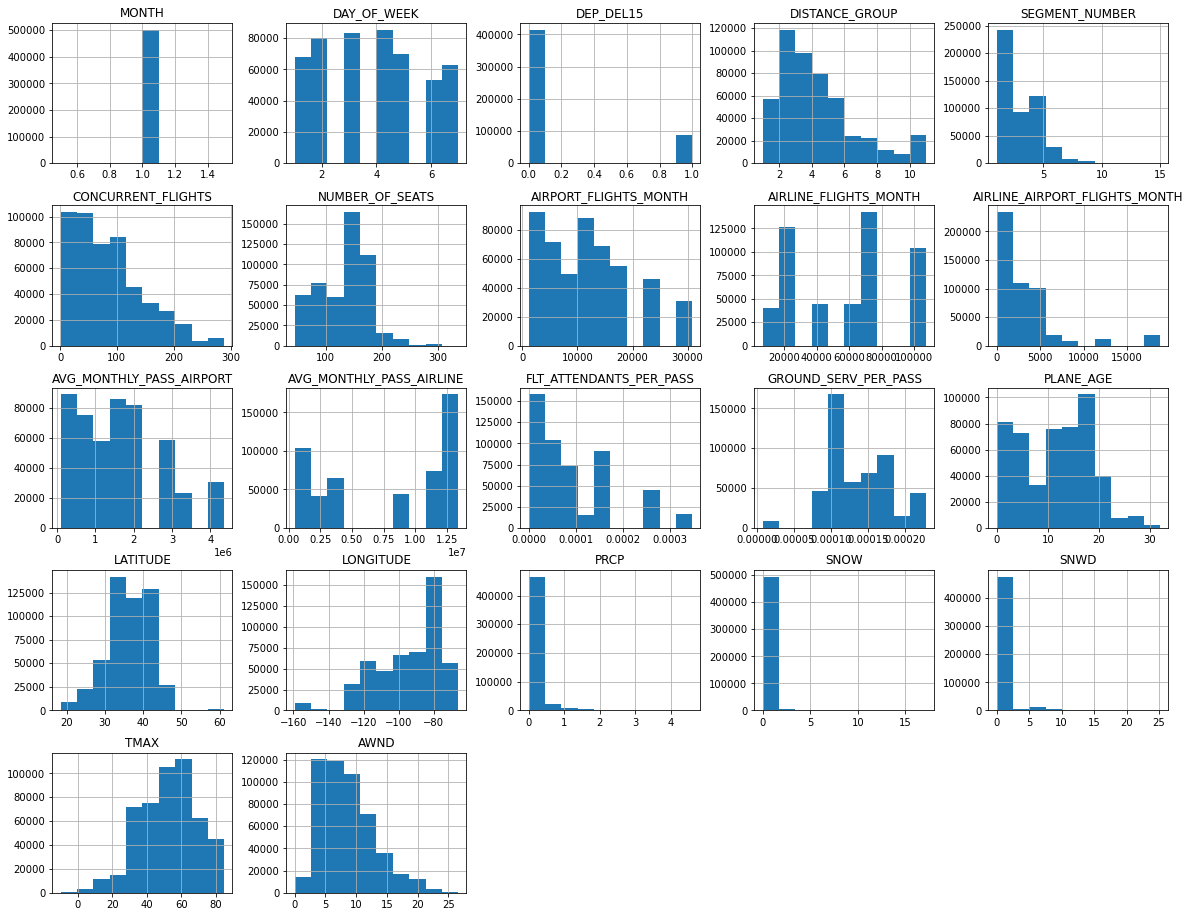

In [5]:
df.hist(figsize=(20,16));

In [6]:
# creat a new column "Delay" to capture the 1 or 0 in DEP_DEL15
df['Delay'] = ['Delay' if value == 1 else 'On-Time' for value in df['DEP_DEL15'].values]
df.head()

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  \
0      1            7          0               2        MORNING   
1      1            7          0               7        MORNING   
2      1            7          0               7        MORNING   
3      1            7          0               9        MORNING   
4      1            7          0               7  EARLY_MORNING   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0               1                 109              143   
1               1                 109              191   
2               1                 109              199   
3               1                 109              180   
4               1                  10              182   

             CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...       DEPARTING_AIRPORT  \
0  Southwest Airlines Co.                  13056  ...  McCarran International   
1    Delta Air Lines Inc.                  13056  ...  McCarran International   
2    Delta Air Lines Inc.                  13056  ...  McCarran International   
3    Delta Air Lines Inc.                  13056  ...  McCarran International   
4        Spirit Air Lines                  13056  ...  McCarran International   

   LATITUDE  LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  AWND  \
0     36.08   -115.152              NONE   0.0   0.0   0.0  65.0  2.91   
1     36.08   -115.152              NONE   0.0   0.0   0.0  65.0  2.91   
2     36.08   -115.152              NONE   0.0   0.0   0.0  65.0  2.91   
3     36.08   -115.152              NONE   0.0   0.0   0.0  65.0  2.91   
4     36.08   -115.152              NONE   0.0   0.0   0.0  65.0  2.91   

     Delay  
0  On-Time  
1  On-Time  
2  On-Time  
3  On-Time  
4  On-Time  

[5 rows x 27 columns]

In [7]:
df_carrier = pd.DataFrame(df.value_counts('CARRIER_NAME'))
df_carrier.columns = ['total_flights']
df_carrier.head()

total_flights
CARRIER_NAME                         
Southwest Airlines Co.         104109
American Airlines Inc.          73401
Delta Air Lines Inc.            69096
United Air Lines Inc.           44465
SkyWest Airlines Inc.           44070

In [8]:
df_carrier['delayed_flights'] = pd.DataFrame(df.groupby('CARRIER_NAME')['DEP_DEL15'].sum())
df_carrier.reset_index(inplace = True)
df_carrier.head()

CARRIER_NAME  total_flights  delayed_flights
0  Southwest Airlines Co.         104109            18125
1  American Airlines Inc.          73401            11708
2    Delta Air Lines Inc.          69096             9055
3   United Air Lines Inc.          44465             8057
4   SkyWest Airlines Inc.          44070             9160

JetBlue Airways	has the highest flight delay rate. Hawaiian Airlines Inc. has the lowest flight delay rate

In [9]:
import plotly.express as px

x = df_carrier['CARRIER_NAME'].unique()
y = df_carrier['delayed_flights']/df_carrier['total_flights'] *100

pct = np.round(y, 2)

fig = px.bar(x = x, y = y, text = pct)
fig.update_layout(title= 'Carrier Delay Ratio',
              yaxis = dict(title='carrier_delay_ratio'),
              xaxis = dict(title='Carrier Name'))
fig.show()


In [10]:
df_airport = pd.DataFrame(df.value_counts('DEPARTING_AIRPORT'))
df_airport.columns = ['total_flights']
df_airport.head()

total_flights
DEPARTING_AIRPORT                          
Atlanta Municipal                     30842
Chicago O'Hare International          23400
Dallas Fort Worth Regional            22775
Douglas Municipal                     18811
Stapleton International               18286

In [11]:
df_airport['delayed_flights'] = pd.DataFrame(df.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].sum())
df_airport.reset_index(inplace = True)
df_airport.head()

DEPARTING_AIRPORT  total_flights  delayed_flights
0             Atlanta Municipal          30842             4131
1  Chicago O'Hare International          23400             6599
2    Dallas Fort Worth Regional          22775             4041
3             Douglas Municipal          18811             2683
4       Stapleton International          18286             3428

Chicago Midway International airport has the highest delay rate. Honolulu International airport has the lowest delay rate

In [12]:
import plotly.express as px

y = df_airport['DEPARTING_AIRPORT'].unique()
x = df_airport['delayed_flights']/df_airport['total_flights'] * 100

pct = np.round(x, 2)

fig = px.bar(x = x, y = y, text = pct, width = 800, height = 1600)
fig.update_layout(title= 'Departing Airport Delay Ratio',
              yaxis = dict(title='Departing Airport'),
              xaxis = dict(title='departing airport delay ratio'))
fig.show()


In [13]:
df_week = pd.DataFrame(df.value_counts('DAY_OF_WEEK'))
df_week.columns = ['total_flights']
df_week.reset_index(inplace = True)


In [14]:
week_delay = pd.DataFrame(df.groupby('DAY_OF_WEEK')['DEP_DEL15'].sum())                      
week_delay.reset_index(inplace=True)
week_delay.columns = ['DAY_OF_WEEK', 'delayed_flights']

week_delay

DAY_OF_WEEK  delayed_flights
0            1            12047
1            2            12817
2            3            14947
3            4            17074
4            5            11952
5            6             7710
6            7            11135

In [15]:
df_week = pd.merge(df_week, week_delay, left_on = 'DAY_OF_WEEK', right_on = 'DAY_OF_WEEK')

In [16]:
df_week = df_week.sort_values(by = ['DAY_OF_WEEK'])

In [17]:
week = {7: 'Sun', 6: 'Sat', 5: 'Fri', 4: 'Thu', 3: 'Wed', 2: 'Tue', 1: 'Mon'}
df_week['DAY_OF_WEEK'] = df_week['DAY_OF_WEEK'].map(week)
df_week.reset_index(inplace = True)

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x= df_week['DAY_OF_WEEK'].unique(), y= df_week['delayed_flights']/df_week['total_flights'] *100, 
               name="flight delay by weekdays"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= df_week['DAY_OF_WEEK'].unique(), y= df_week['total_flights'].unique(), 
               name="total flights by weekdays"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Flight delay ratio by weekdays"
)

# Set x-axis title
fig.update_xaxes(title_text="day of week")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> flight delay ratio by weekdays", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> total flights by weekdays", secondary_y=True)

fig.show()


In [19]:
df_dep_block = pd.DataFrame(df['DEP_BLOCK'].value_counts())
df_dep_block.reset_index(inplace = True)
df_dep_block.columns = ['DEP_BLOCK', 'total_flights']


In [20]:
dep_block_delay = pd.DataFrame(df.groupby('DEP_BLOCK')['DEP_DEL15'].sum())
dep_block_delay.reset_index(inplace = True)
dep_block_delay.columns = ['DEP_BLOCK', 'delayed_flights']

In [21]:
df_dep_block  = pd.merge(df_dep_block , dep_block_delay, left_on = 'DEP_BLOCK', right_on = 'DEP_BLOCK')
df_dep_block

DEP_BLOCK  total_flights  delayed_flights
0        MORNING         130705            12659
1      AFTERNOON         119182            24676
2        EVENING         114517            26975
3         MIDDAY          94518            15883
4     LATE_NIGHT          32704             6720
5  EARLY_MORNING          10424              769

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x= df_dep_block['DEP_BLOCK'].unique(), y= df_dep_block['delayed_flights']/df_dep_block['total_flights'] *100, 
               name="flight delay by DEP_BLOCK"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x= df_dep_block['DEP_BLOCK'].unique(), y= df_dep_block['total_flights'].unique(), 
               name="total flights by DEP_BLOCK"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Flight delay ratio by DEP_BLOCK"
)

# Set x-axis title
fig.update_xaxes(title_text="day of week")

# Set y-axes titles
fig.update_yaxes(title_text=" flight delay ratio by DEP_BLOCK", secondary_y=False)
fig.update_yaxes(title_text=" total flights by DEP_BLOCK", secondary_y=True)

fig.show()


In [23]:
corr_matrix = df.corr()

In [24]:
corr_matrix.DEP_DEL15.sort_values(ascending = False)

DEP_DEL15                        1.000000
AWND                             0.095296
SEGMENT_NUMBER                   0.093747
PRCP                             0.081789
SNWD                             0.079394
SNOW                             0.076356
LONGITUDE                        0.047438
LATITUDE                         0.033035
AIRPORT_FLIGHTS_MONTH            0.018294
AVG_MONTHLY_PASS_AIRPORT         0.014449
CONCURRENT_FLIGHTS               0.014315
DISTANCE_GROUP                   0.008018
FLT_ATTENDANTS_PER_PASS          0.004943
PLANE_AGE                        0.002649
DAY_OF_WEEK                     -0.003650
AIRLINE_AIRPORT_FLIGHTS_MONTH   -0.014453
AIRLINE_FLIGHTS_MONTH           -0.023757
GROUND_SERV_PER_PASS            -0.028393
NUMBER_OF_SEATS                 -0.029276
AVG_MONTHLY_PASS_AIRLINE        -0.039574
TMAX                            -0.082127
MONTH                                 NaN
Name: DEP_DEL15, dtype: float64

According to correlation vlaues, flight delay might be correlated with PRCP, SNWD, SNOW, SEGMENT_NUMBER, and AWND

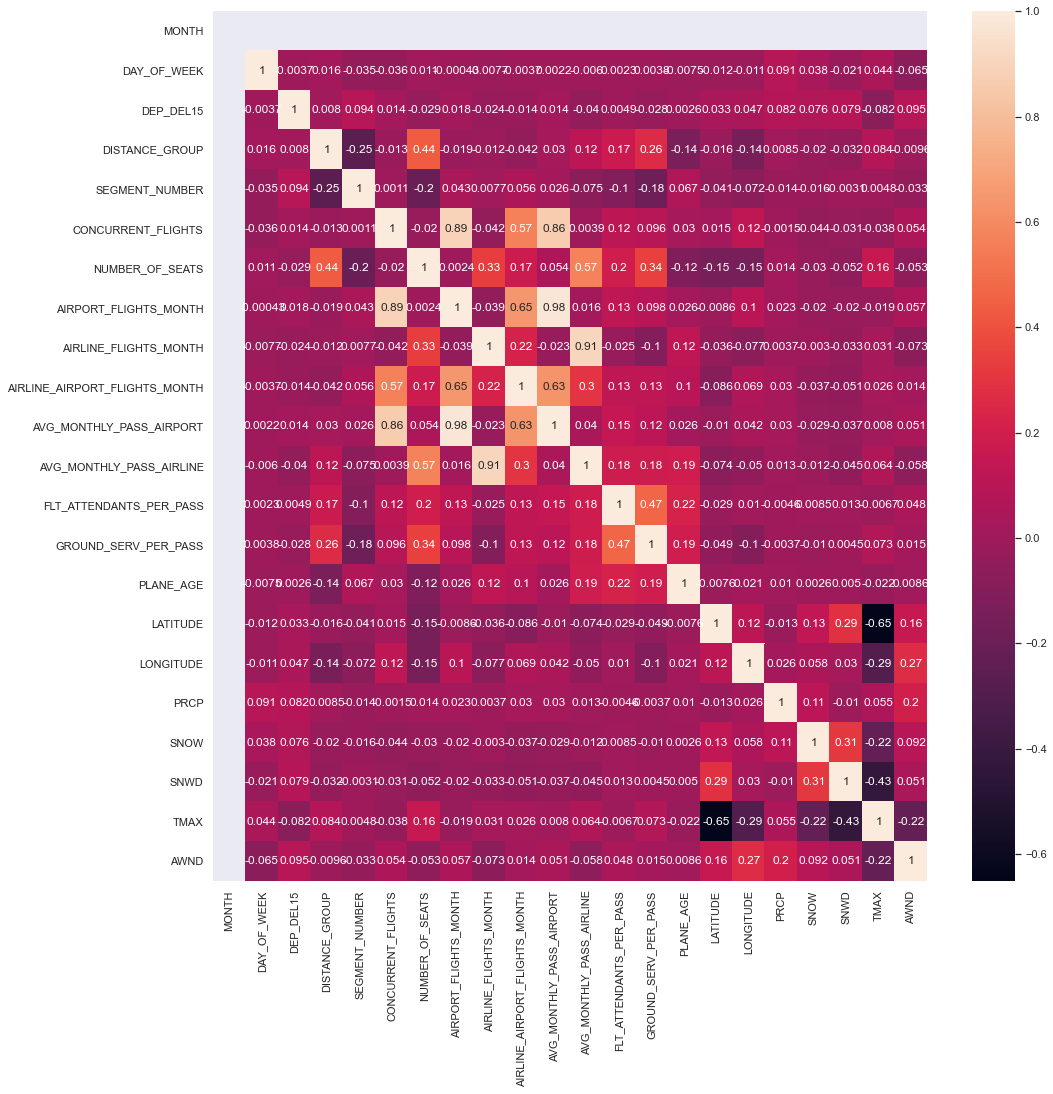

In [25]:
plt.figure(figsize = (16,16))
sns.set()
sns.heatmap(corr_matrix, annot = True);

<AxesSubplot:xlabel='SEGMENT_NUMBER', ylabel='Delay'>

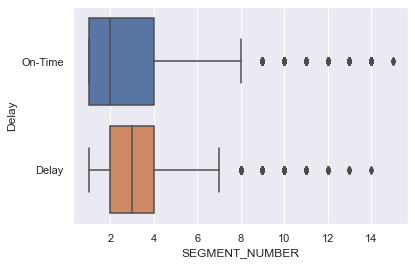

In [26]:
sns.boxplot( 'SEGMENT_NUMBER', 'Delay', data = df)

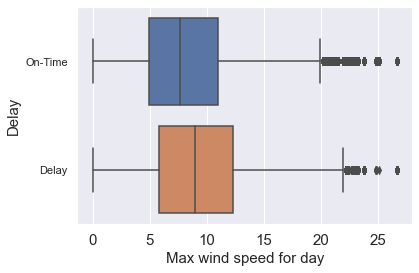

In [27]:
sns.boxplot(y = 'Delay', x = 'AWND', data = df)
_ = plt.ylabel ('Delay', fontsize = 15)
_ = plt.xlabel ('Max wind speed for day', fontsize = 15)
_ = plt.tick_params (axis = 'x',labelsize = 15)

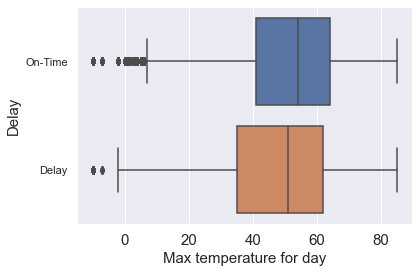

In [28]:
sns.boxplot(y = 'Delay', x = 'TMAX', data = df)
_ = plt.ylabel ('Delay', fontsize = 15)
_ = plt.xlabel ('Max temperature for day', fontsize = 15)
_ = plt.tick_params (axis = 'x',labelsize = 15)

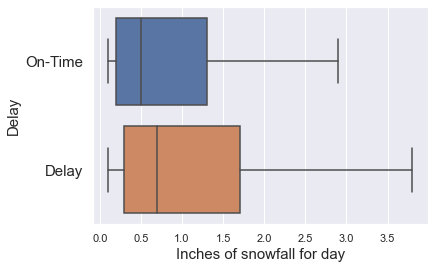

In [29]:
# df.mask(df == 0) converts the 0 value into NaN, which avoids to mess up with boxplot 
sns.boxplot(y = 'Delay', x = 'SNOW', data = df.mask(df == 0), showfliers = False)
_ = plt.ylabel ('Delay', fontsize = 15)
_ = plt.xlabel ('Inches of snowfall for day', fontsize = 15)
_ = plt.tick_params (axis = 'y',labelsize = 15)

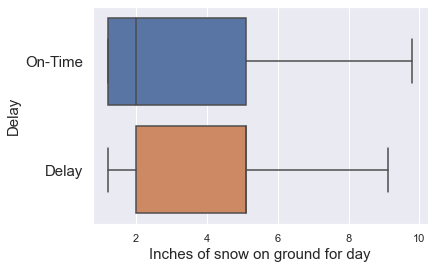

In [30]:
# df.mask(df == 0) converts the 0 value into NaN, which avoids to mess up with boxplot 
sns.boxplot(y = 'Delay', x = 'SNWD', data = df.mask(df == 0), showfliers = False)
_ = plt.ylabel ('Delay', fontsize = 15)
_ = plt.xlabel ('Inches of snow on ground for day', fontsize = 15)
_ = plt.tick_params (axis = 'y',labelsize = 15)

In [31]:
X = df.drop(['DEP_DEL15', 'Delay'], axis = 1)
y = df['DEP_DEL15']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
flight = X_train.copy()
flight_label = y_train.copy()

In [34]:
flight_test = X_test.copy()
flight_label_test = y_test.copy()

In [35]:
cat_attribs = list(flight.select_dtypes(include = ['object']).columns)
cat_attribs

['DEP_BLOCK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']

In [36]:
flight_num = flight.drop(cat_attribs, axis = 1)
flight_cat = flight[(cat_attribs)]

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline ([('scaler', StandardScaler())])

In [38]:
from sklearn.preprocessing import OrdinalEncoder
cat_pipeline = Pipeline ([('encoder', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-999))])

In [39]:
from sklearn.compose import ColumnTransformer

num_attribs = list(flight_num.columns)

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                  ('cat', cat_pipeline, cat_attribs)
                                  ])
flight_prepared = full_pipeline.fit_transform(flight)

In [40]:
flight_test_prepared = full_pipeline.transform(flight_test)

In [41]:
flight_prepared.shape, flight_test_prepared.shape

((401640, 25), (100410, 25))

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state = 42)
sgd_clf.fit(flight_prepared, flight_label)

SGDClassifier(random_state=42)

In [43]:
flight_pred_sgd = sgd_clf.predict (flight_test_prepared)

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(flight_label_test, flight_pred_sgd)
cm

array([[82994,    80],
       [17238,    98]])

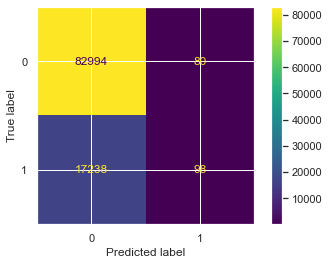

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = sgd_clf.classes_)
disp.plot(cmap = 'viridis');

<font color = blue>
When it claims on time(DEL_15: 0), it is correct only 83% of the time (precision). Moreover, it predicts 79% of the on tie (DEL_15: 0) (recall). It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of
precision and recall. Whereas the regular mean treats all values equally, the harmonic
mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if
both recall and precision are high. Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is
called the precision/recall tradeoff.
    


In [46]:
from sklearn.metrics import classification_report

print(classification_report(flight_label_test, flight_pred_sgd))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     83074
           1       0.55      0.01      0.01     17336

    accuracy                           0.83    100410
   macro avg       0.69      0.50      0.46    100410
weighted avg       0.78      0.83      0.75    100410



In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier (n_estimators = 10, random_state = 42)
rf_clf.fit(flight_prepared, flight_label)

RandomForestClassifier(n_estimators=10, random_state=42)

In [48]:
from sklearn.model_selection import cross_val_predict

flight_pred_rf = rf_clf.predict (flight_test_prepared)

In [50]:
cm = confusion_matrix(flight_label_test, flight_pred_rf)
cm

array([[79534,  3540],
       [13804,  3532]])

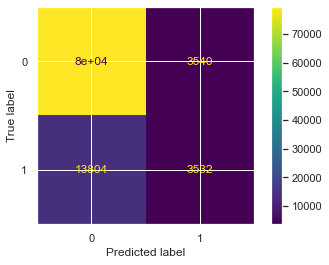

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_clf.classes_)
disp.plot(cmap = 'viridis');

In [53]:
print(classification_report(flight_label_test, flight_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     83074
           1       0.50      0.20      0.29     17336

    accuracy                           0.83    100410
   macro avg       0.68      0.58      0.60    100410
weighted avg       0.79      0.83      0.80    100410



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}]
rf_clf = RandomForestClassifier(random_state = 42)
rf_grid = GridSearchCV(rf_clf, param_grid, cv = 5, return_train_score = True)
rf_grid.fit(flight_prepared, flight_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True)

In [55]:
rf_grid.best_params_

{'max_features': 2, 'n_estimators': 30}

In [56]:
rf_grid.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [57]:
pd.DataFrame(rf_grid.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       13.549099      0.215413         0.956734        0.018362   
5       21.897712      0.869863         0.918974        0.012991   
11      37.722879      1.148054         0.851372        0.010175   
8       29.872692      0.461920         0.893285        0.022616   
4        7.103880      0.098156         0.308930        0.004725   

   param_max_features param_n_estimators  \
2                   2                 30   
5                   4                 30   
11                  8                 30   
8                   6                 30   
4                   4                 10   

                                     params  split0_test_score  \
2   {'max_features': 2, 'n_estimators': 30}           0.829113   
5   {'max_features': 4, 'n_estimators': 30}           0.829113   
11  {'max_features': 8, 'n_estimators': 30}           0.828902   
8   {'max_features': 6, 'n_estimators': 30}           0.829449   
4   {'max_features': 4, 'n_estimators': 10}           0.825403   

    split1_test_score  split2_test_score  ...  mean_test_score  \
2            0.829611           0.829835  ...         0.830039   
5            0.828528           0.830570  ...         0.829885   
11           0.828665           0.829910  ...         0.829541   
8            0.828789           0.829686  ...         0.829492   
4            0.824656           0.826710  ...         0.825946   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
2         0.000715                1            0.995048            0.995005   
5         0.000951                2            0.995086            0.995139   
11        0.000813                3            0.995456            0.995179   
8         0.000741                4            0.995170            0.995269   
4         0.000818                5            0.978049            0.978102   

    split2_train_score  split3_train_score  split4_train_score  \
2             0.995064            0.995108            0.994989   
5             0.995086            0.995244            0.995151   
11            0.995344            0.995394            0.995248   
8             0.995114            0.995341            0.995220   
4             0.978115            0.978342            0.978087   

    mean_train_score  std_train_score  
2           0.995043         0.000042  
5           0.995141         0.000058  
11          0.995324         0.000100  
8           0.995223         0.000079  
4           0.978139         0.000104  

[5 rows x 22 columns]

In [58]:
feature_importances = rf_grid.best_estimator_.feature_importances_
feature_importances

array([0.        , 0.05106493, 0.08140104, 0.06896111, 0.09177204,
       0.053327  , 0.01548381, 0.00776761, 0.0196673 , 0.01482516,
       0.00811035, 0.00702399, 0.00813674, 0.12595774, 0.01574317,
       0.01600115, 0.03431186, 0.00993901, 0.01028872, 0.08111137,
       0.08117941, 0.04799101, 0.00778311, 0.01439874, 0.12775366])

sorted (zip(feature_importances, attribs), reverse = True)

In [59]:
attribs = num_attribs + cat_attribs

feature_importances = pd.DataFrame(zip(feature_importances, attribs), 
                                  columns = ['feature_importance', 'attribute']).sort_values('feature_importance', 
                                                                                             ascending = False)
feature_importances

feature_importance                      attribute
24            0.127754               PREVIOUS_AIRPORT
13            0.125958                      PLANE_AGE
4             0.091772             CONCURRENT_FLIGHTS
2             0.081401                 DISTANCE_GROUP
20            0.081179                           AWND
19            0.081111                           TMAX
3             0.068961                 SEGMENT_NUMBER
5             0.053327                NUMBER_OF_SEATS
1             0.051065                    DAY_OF_WEEK
21            0.047991                      DEP_BLOCK
16            0.034312                           PRCP
8             0.019667  AIRLINE_AIRPORT_FLIGHTS_MONTH
15            0.016001                      LONGITUDE
14            0.015743                       LATITUDE
6             0.015484          AIRPORT_FLIGHTS_MONTH
9             0.014825       AVG_MONTHLY_PASS_AIRPORT
23            0.014399              DEPARTING_AIRPORT
18            0.010289                           SNWD
17            0.009939                           SNOW
12            0.008137           GROUND_SERV_PER_PASS
10            0.008110       AVG_MONTHLY_PASS_AIRLINE
22            0.007783                   CARRIER_NAME
7             0.007768          AIRLINE_FLIGHTS_MONTH
11            0.007024        FLT_ATTENDANTS_PER_PASS
0             0.000000                          MONTH

<font color = blue>
     RandomForestClassifier with best parameter 'max_features': 2, 'n_estimators': 30

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_best_grid = RandomForestClassifier (n_estimators = 30, max_features = 2, random_state = 42)
rf_clf_best_grid.fit(flight_prepared, flight_label)


RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [61]:
flight_pred_rf_grid = rf_clf_best_grid.predict(flight_test_prepared)


In [62]:
cm = confusion_matrix(flight_label_test, flight_pred_rf_grid)
cm

array([[80057,  3017],
       [13822,  3514]])

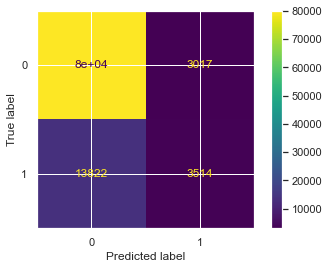

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_clf_best_grid.classes_)
disp.plot(cmap = 'viridis');

In [64]:
print(classification_report(flight_label_test, flight_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     83074
           1       0.54      0.20      0.29     17336

    accuracy                           0.83    100410
   macro avg       0.70      0.58      0.60    100410
weighted avg       0.80      0.83      0.80    100410



In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_distribs = {'n_estimators': randint(low = 1,high = 200),
                    'max_features': randint(low = 1, high = 8)}

rf_clf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(rf_clf, param_distributions = param_distribs, 
                               cv = 5, n_iter = 10, random_state = 42 )
rf_random.fit(flight_prepared, flight_label)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff5202a4580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff5530bfca0>},
                   random_state=42)

In [69]:
rf_random.best_params_

{'max_features': 3, 'n_estimators': 150}

In [70]:
rf_random.best_estimator_

RandomForestClassifier(max_features=3, n_estimators=150, random_state=42)

In [71]:
pd.DataFrame(rf_random.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      86.139531      1.106669         4.627739        0.029432   
6      49.378683      0.215646         2.661053        0.024458   
0     217.004469     16.255661         5.346950        0.272756   
7      83.065878      0.814932         2.937431        0.024491   
4     131.051326      0.616444         3.431826        0.061863   

  param_max_features param_n_estimators  \
8                  3                150   
6                  3                 88   
0                  7                180   
7                  5                100   
4                  7                122   

                                     params  split0_test_score  \
8  {'max_features': 3, 'n_estimators': 150}           0.831167   
6   {'max_features': 3, 'n_estimators': 88}           0.830819   
0  {'max_features': 7, 'n_estimators': 180}           0.830557   
7  {'max_features': 5, 'n_estimators': 100}           0.830893   
4  {'max_features': 7, 'n_estimators': 122}           0.830495   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.831093           0.831939           0.831914           0.833694   
6           0.830619           0.831267           0.831902           0.833383   
0           0.830906           0.832213           0.830669           0.833595   
7           0.830707           0.831192           0.831478           0.833246   
4           0.830458           0.831777           0.830868           0.833396   

   mean_test_score  std_test_score  rank_test_score  
8         0.831961        0.000937                1  
6         0.831598        0.000995                2  
0         0.831588        0.001165                3  
7         0.831503        0.000910                4  
4         0.831399        0.001106                5

In [72]:
feature_importances = rf_random.best_estimator_.feature_importances_
feature_importances

array([0.        , 0.05119395, 0.08238509, 0.06453717, 0.08942227,
       0.05498627, 0.01547826, 0.00935385, 0.02206057, 0.01495433,
       0.00925392, 0.0085349 , 0.00959463, 0.12569089, 0.01632199,
       0.01699791, 0.03384532, 0.00986252, 0.01035944, 0.07906003,
       0.07997226, 0.04563255, 0.00938707, 0.01512633, 0.12598848])

In [73]:
feature_importances = pd.DataFrame(zip(feature_importances, attribs), 
                                   columns = ['feature_importance', 'attribute']).sort_values('feature_importance', 
                                                                                             ascending = False)
feature_importances

feature_importance                      attribute
24            0.125988               PREVIOUS_AIRPORT
13            0.125691                      PLANE_AGE
4             0.089422             CONCURRENT_FLIGHTS
2             0.082385                 DISTANCE_GROUP
20            0.079972                           AWND
19            0.079060                           TMAX
3             0.064537                 SEGMENT_NUMBER
5             0.054986                NUMBER_OF_SEATS
1             0.051194                    DAY_OF_WEEK
21            0.045633                      DEP_BLOCK
16            0.033845                           PRCP
8             0.022061  AIRLINE_AIRPORT_FLIGHTS_MONTH
15            0.016998                      LONGITUDE
14            0.016322                       LATITUDE
6             0.015478          AIRPORT_FLIGHTS_MONTH
23            0.015126              DEPARTING_AIRPORT
9             0.014954       AVG_MONTHLY_PASS_AIRPORT
18            0.010359                           SNWD
17            0.009863                           SNOW
12            0.009595           GROUND_SERV_PER_PASS
22            0.009387                   CARRIER_NAME
7             0.009354          AIRLINE_FLIGHTS_MONTH
10            0.009254       AVG_MONTHLY_PASS_AIRLINE
11            0.008535        FLT_ATTENDANTS_PER_PASS
0             0.000000                          MONTH

<font color = blue>
     RandomForestClassifier with best parameter 'max_features': 3, 'n_estimators': 150

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_best_random = RandomForestClassifier (n_estimators = 150, max_features = 3, random_state = 42)
rf_clf_best_random.fit(flight_prepared, flight_label)

RandomForestClassifier(max_features=3, n_estimators=150, random_state=42)

In [75]:
flight_pred_rf_random = rf_clf_best_random.predict(flight_test_prepared)


In [76]:
cm = confusion_matrix(flight_label_test, flight_pred_rf_random)
cm

array([[80082,  2992],
       [13718,  3618]])

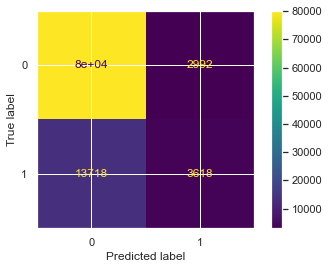

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_clf_best_random.classes_)
disp.plot(cmap = 'viridis');

In [78]:
print(classification_report(flight_label_test, flight_pred_rf_random))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91     83074
           1       0.55      0.21      0.30     17336

    accuracy                           0.83    100410
   macro avg       0.70      0.59      0.60    100410
weighted avg       0.80      0.83      0.80    100410

